In [1]:
import pandas as pd
import sys
import os
sys.path.insert(0,r'C:\Users\shrut\PycharmProjects\pythonProject')
import Clean_pipe3 as cp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, plot_confusion_matrix, plot_roc_curve
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel(r'C:\Users\shrut\PycharmProjects\pythonProject\Healthcare_dataset.xlsx',sheet_name="Dataset")
X, y = cp.altCleaning(data)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2568, 231)
(2568,)
(856, 231)
(856,)


In [4]:
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "solver": ["liblinear", "saga"],
    "penalty": ["l1", "l2"]
}

lg_gs = GridSearchCV(
    estimator= LogisticRegression(),
    param_grid= params,
    cv= 5
)

In [5]:
lg_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [6]:
pd.concat([pd.DataFrame(lg_gs.cv_results_["params"]),pd.DataFrame(lg_gs.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

,C,penalty,solver,Accuracy
0,0.001,l1,liblinear,0.619549
1,0.001,l1,saga,0.619549
2,0.001,l2,liblinear,0.762076
3,0.001,l2,saga,0.765190
4,0.010,l1,liblinear,0.772974
5,0.010,l1,saga,0.772974
6,0.010,l2,liblinear,0.810743
7,0.010,l2,saga,0.809184
8,0.100,l1,liblinear,0.807244
9,0.100,l1,saga,0.807244


In [7]:
print(lg_gs.best_params_)
print(lg_gs.best_score_)

{'C': 1, 'penalty': 'l1', 'solver': 'saga'}
0.8197108638435692


In [8]:
y_pred = lg_gs.predict(X_test)

In [9]:
f1_score(y_test, y_pred, average='weighted')

0.8148212133735527

[[478  66]
 [ 91 221]]


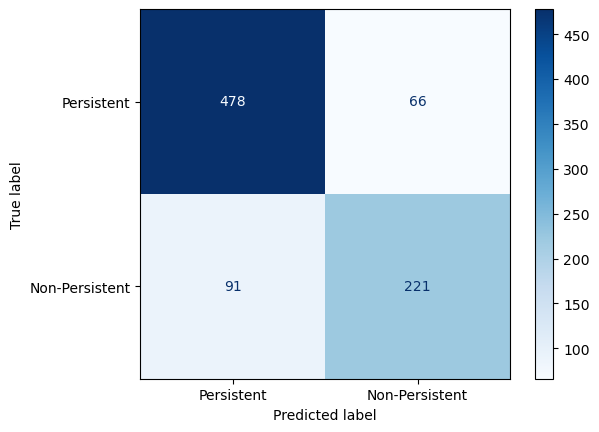

In [10]:
disp = plot_confusion_matrix(
    lg_gs,
    X_test,
    y_test,
    display_labels= ["Persistent", "Non-Persistent"],
    cmap= plt.cm.Blues
)

print(disp.confusion_matrix)

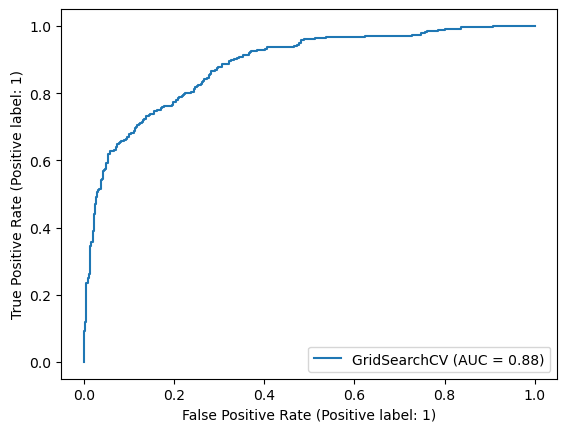

In [11]:
plot_roc_curve(lg_gs, X_test, y_test)
plt.show()